# 1. Setup

## 1.1 Module Import

In [1]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('bmh')

### 1.2 Defining Functions

Here, we will be predefining and explaining the functions that will be used later in our notebook.

In [2]:
'''Function to provide a list of unique values within each column'''

def uniques(df):

    for col in df:
        print(df[col].unique())

'''
Function to provide a unique count of values from a dataframe
'''

def value_counts(df):
    for col in df:
        print(df[col].value_counts())

'''Function that prints a summary of the descriptive statistics of
a dataframe'''
def eda(df): 
    data = {}
    data['null_sum'] = df.isnull().sum()
    data['null_pct'] = df.isnull().mean()
    data['dtypes'] = df.dtypes
    data['count'] = df.count()
    data['mean'] = df.mean()
    data['median'] = df.median()
    data['min'] = df.min()
    data['max'] = df.max()
    
    return pd.DataFrame(data)

'''Creating a boxplot function to compare it against our target
variable of Offer Accepted'''

def box(df):
    for col in df:
        sns.boxplot(x=col, y = 'offer_accepted', data = data)
        plt.show()

'''
Creating a Function to print an accuracy k chart
High values can lead to slow processing times
10 is set as a base
'''

def accuracy_k_chart(X_test,y_test,X_train,y_train):
    scores = []

    for i in range(2,10):
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))

    plt.plot(range(2,10),scores,color = 'blue',linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('accuracy scores vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()
    
'''Log Transform Function'''
    
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):  
        return x
    else:
        return np.NAN

'''The sample all function takes an input of x and y, x being the dependent
variable, y being the independent variable

The function runs various regression types and creates an output which allows you to decide
which sampling technique is optimal for your dataset. Confusion matrices for each
of the Logistic and and KNN Regressions.

The output is in the following order:

1. Classification score of Logistic Regression Following Sample Adjustment

2. Logistic Regression Score on X_test, y_test

3. Confusion Matrix of y_test

4. Classification Report of the Logistic Regression on X_test, y_test

5. KNN Model Score

6. KNN Model Confusion Matrix

7. KNN Model Classification Report

8. KNN Model Accuracy Chart

9. ROC Curve - Logistic Regression

10. ROC Curve - KNN'''

def sample_all (x, y):
    
    #Random OverSampler
    ros = RandomOverSampler()
    X = x
    X_ros, y_ros = ros.fit_sample(X, y)
    
    classification = LogisticRegression(random_state=0, solver='lbfgs',
                                        multi_class='ovr').fit(X_ros, y_ros)
    print('\n\n\nRandom Oversampling Classification Score:', classification.score(X_ros, y_ros))
    
    #Accuracy Score and Confusion Matrix
    X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3,random_state=100)
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    y_pred = logreg.predict(X_test)
    print ('\nLogistic regression classifier on test set: {:.2F}'.format(logreg.score(X_test,y_test)))
    print('\n',confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    
    model = KNeighborsClassifier(n_neighbors=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\nKNN Model Score: ',model.score(X_test, y_test), '\n')
    print('\n',confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    accuracy_k_chart(X_test,y_test,X_train,y_train)
    
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1], pos_label=2)
    plt.figure()
    plt.plot(fpr, tpr, label='Logreg Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=2)
    plt.figure()
    plt.plot(fpr, tpr, label='KNN Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    
    #Random Under Sampler
    
    rus = RandomUnderSampler()
    X = x
    X_rus, y_rus = rus.fit_sample(X, y)
    
 
    transformer = StandardScaler().fit(X_rus)
    X = transformer.transform(X_rus)
    classification = LogisticRegression(random_state=0, solver='lbfgs',
                                        multi_class='ovr').fit(X_rus, y_rus)
    print('\n\nRandom Undersampling Classification Score:', classification.score(X_rus, y_rus))
    
    #Accuracy Score and Confusion Matrix
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size = 0.3)
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    y_pred = logreg.predict(X_test)
    print ('\n Accuracy of logistic regression classifier on test set: {:.2F}'.format(logreg.score(X_test,y_test)))
    print('\n',confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    
    model = KNeighborsClassifier(n_neighbors=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\nKNN Model Score: ',model.score(X_test, y_test), '\n')
    print('\n',confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    accuracy_k_chart(X_test,y_test,X_train,y_train)
    
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1], pos_label=2)
    plt.figure()
    plt.plot(fpr, tpr, label='Logreg Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=2)
    plt.figure()
    plt.plot(fpr, tpr, label='KNN Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    
    
    #SMOTE - outputs X_sm, y_sm

    smote = SMOTE()
    Xsmote = x
    transformer = StandardScaler().fit(Xsmote)
    Xsmote = transformer.transform(Xsmote)
    X_sm, y_sm = smote.fit_sample(Xsmote, y)
    
    classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)
    print('\n\nSMOTE Classification Score:', classification.score(X_sm, y_sm))
    
    #Accuracy Score and Confusion Matrix
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    y_pred = logreg.predict(X_test)
    print ('\nAccuracy of logistic regression classifier on test set: {:.2F}'.format(logreg.score(X_test,y_test)))
    print('\n',confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    
    model = KNeighborsClassifier(n_neighbors=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\nKNN Model Score: ',model.score(X_test, y_test), '\n')
    print('\n',confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    accuracy_k_chart(X_test,y_test,X_train,y_train)
    
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1], pos_label=2)
    plt.figure()
    plt.plot(fpr, tpr, label='Logreg Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=2)
    plt.figure()
    plt.plot(fpr, tpr, label='KNN Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()    

### 1.3  Reading the File

After preparation, we then load the dataset into a DataFrame for inspection.

In [3]:
#reading excel file
data = pd.read_excel("creditcardmarketing_clean.xlsx")
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


#### The Dataset
##### The data set stores information about 18.0000 customers.The columns are defined as follows:
- Customer Number:  A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
- Offer Accepted: TDid the customer accept (Yes) or reject (No) the offer. Reward: The type of reward program offered for the card.
- Reward: Gives inforamtion about the reward offered to the customer.
- Mailer Type: Letter or postcard.
- Income Level: Low, Medium or High.
- Bank Accounts Open: How many non-credit-card accounts are held by the customer.
- Overdraft Protection: Does the customer have overdraft protection on their checking account(s) (Yes or No).
- Credit Rating: Low, Medium, or High.
- Credit Cards Held: The number of credit cards held at the bank.
- Homes Owned: The number of homes owned by the customer.
- Household Size: The number of individuals in the family.
- Own Your Home: Does the customer own their home? (Yes or No).
- Average Balance: Average balance for each quarter in the last year.
- Q1-4 Balance: Average account balance (across all accounts over time) for Q1, Q2, Q3 and Q4.

## 1.4 Header Standardization

We opted to use Snake Casing for header standardization due to its simplicity.

In [4]:
#Snake Casing - Lower case and replacing blanks with underscore
new_cols = [col.replace(" ", "_").lower() for col in data]
data.columns = new_cols
data.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', '#_bank_accounts_open', 'overdraft_protection',
       'credit_rating', '#_credit_cards_held', '#_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance'],
      dtype='object')

In [5]:
new_cols2 = [col.replace("#_", "") for col in data]
data.columns = new_cols2

## 1.5 Checking for and removing NaN Values


At this point we checked for the percentage of null values per column. As we only found a small number of them we decided to drop those rows. 

Alternatively we could also replace them with the mean value, but percentages are so low that it is not necessary.<br> After dropping 24 rows we have now 17976 observations left. <br> We also decided to drop the rows with the index 38 and 101. This is done because they uniquely represent the household_size 8 and 9 respectively.

In [6]:
#Checking for NaN in dataset
data.isna().sum()/data.shape[0] 

customer_number         0.000000
offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
bank_accounts_open      0.000000
overdraft_protection    0.000000
credit_rating           0.000000
credit_cards_held       0.000000
homes_owned             0.000000
household_size          0.000000
own_your_home           0.000000
average_balance         0.001333
q1_balance              0.001333
q2_balance              0.001333
q3_balance              0.001333
q4_balance              0.001333
dtype: float64

In [7]:
data.shape

(18000, 17)

In [8]:
#Dropping rows containing NaN values
data.dropna(0, 'any', inplace =True)

#alternative we can replace NaN with mean value. But the percentage are so low it is not necessary.
#data['df_log'] = data['df_log'].fillna(np.mean(data['df_log']))

In [9]:
#after droping 24 rows we have a shape of 17976 rows
data.shape

(17976, 17)

In [10]:
#Dropping Data at Index 38,101
data = data.drop(labels=[38,101], axis=0)

# 2. Categorical Variables and Ordinal Numerics

At this point we look more closely at our ordinal numerics as a well as at our categorical variables. We extract the categoricals of type 'object' and the ordinal numerics of type 'int64' and stored them as "categoricals" and "numericals" respectively (the remaining numerical variables are in the form of floats). Afterwards, we defined a function that shows us the unique values for the categoricals and numericals.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17974 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       17974 non-null  int64  
 1   offer_accepted        17974 non-null  object 
 2   reward                17974 non-null  object 
 3   mailer_type           17974 non-null  object 
 4   income_level          17974 non-null  object 
 5   bank_accounts_open    17974 non-null  int64  
 6   overdraft_protection  17974 non-null  object 
 7   credit_rating         17974 non-null  object 
 8   credit_cards_held     17974 non-null  int64  
 9   homes_owned           17974 non-null  int64  
 10  household_size        17974 non-null  int64  
 11  own_your_home         17974 non-null  object 
 12  average_balance       17974 non-null  float64
 13  q1_balance            17974 non-null  float64
 14  q2_balance            17974 non-null  float64
 15  q3_balance         

#### Takeaways

We can see in the data that our primary key and ordinal(discrete) numberics are of the int64 dtype, and our categorical variables are listed as objects. Remaining numerical variables are in the form of floats

Let's select the categorical variables, and discrete numeric variables, and check the unique values. We don't need to worry about outliers in the discrete variables though, we will handle those later.

In [12]:
#Extract Categorical Variables
categoricals = data.select_dtypes(np.object)

#Extract Discrete Numerical Variables
discrete = data.select_dtypes(np.int64)
        
uniques(categoricals)
uniques(discrete)

['No' 'Yes']
['Air Miles' 'Cash Back' 'Points']
['Letter' 'Postcard']
['High' 'Medium' 'Low']
['No' 'Yes']
['High' 'Medium' 'Low']
['No' 'Yes']
[    1     2     3 ... 17998 17999 18000]
[1 2 3]
[2 1 3 4]
[1 2 3]
[4 5 2 6 3 1]


## 2.2 Encoding

Here, we will be label encoding our categorical columns using a temporary dataframe. We don't need to worry about the encoding specificity of reward or mailer type, so we're going to use a simpler method to encode.

In [13]:
#Remaking categoricals for manipulation
cat_E = categoricals

#Label Encoding using a dictionary
cat_E["income_level"] = categoricals["income_level"].map({"Low" : 3, "Medium" : 2, "High" : 1})
cat_E["offer_accepted"] = categoricals["offer_accepted"].map({"Yes" : 2, "No" : 1})
cat_E["credit_rating"] = categoricals["credit_rating"].map({"Low" : 3, "Medium" : 2, "High" : 1})
cat_E["overdraft_protection"] = categoricals["overdraft_protection"].map({"Yes" : 1, "No" : 2})
cat_E["own_your_home"] = categoricals["own_your_home"].map({"Yes" : 2, "No" : 1})

#Label Encode Reward
cat_E['reward'].astype('category')
cat_E["reward"] = categoricals["reward"].map({"Air Miles" : 3, "Cash Back" : 1, "Points" : 2})
#Label Encode Mail Type
cat_E['mailer_type'] = cat_E['mailer_type'].astype('category')
cat_E["mailer_type"] = categoricals["mailer_type"].map({"Letter" : 2, "Postcard" : 1})



## 2.3 Merging the Tables

Merging the tables is a step that must be taken using a join to avoid indexing issues later, which will cause NaNs equal to the number of removed rows to be found in an eventual concatenated numerical and categorical DataFrame.

In [14]:
#Add Customer Number 
cat_E['customer_number']= discrete['customer_number']
#Merge Categorical Dataframes on Customer Number
cat_F = pd.merge(cat_E,discrete,on='customer_number')
#Drop Customer_number prior to analysis
cat_F = cat_F.drop(['customer_number'], axis=1)

#Checking the DataFrame
cat_F = cat_F.astype('object')
cat_F.head()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home,bank_accounts_open,credit_cards_held,homes_owned,household_size
0,1,3,2,1,2,1,1,1,2,1,4
1,1,3,2,2,2,2,2,1,2,2,5
2,1,3,1,1,2,2,2,2,2,1,2
3,1,3,2,2,2,1,1,2,1,1,4
4,1,3,2,2,2,2,2,1,2,1,6


In [15]:
categoricals = cat_F


## 2.4 Cleaning Summary

We've now got a clean table of categorical and discrete numerical variables and can move on to the analysis of our categorical data!

In [16]:
value_counts(categoricals)

1    16954
2     1020
Name: offer_accepted, dtype: int64
3    6046
1    5995
2    5933
Name: reward, dtype: int64
1    9132
2    8842
Name: mailer_type, dtype: int64
2    9002
1    4517
3    4455
Name: income_level, dtype: int64
2    15299
1     2675
Name: overdraft_protection, dtype: int64
1    6064
2    5964
3    5946
Name: credit_rating, dtype: int64
2    11636
1     6338
Name: own_your_home, dtype: int64
1    13672
2     4007
3      295
Name: bank_accounts_open, dtype: int64
2    7933
1    6145
3    3381
4     515
Name: credit_cards_held, dtype: int64
1    14501
2     3288
3      185
Name: homes_owned, dtype: int64
3    5705
4    5532
5    2851
2    2809
1     539
6     538
Name: household_size, dtype: int64


In [17]:
categoricals.head()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home,bank_accounts_open,credit_cards_held,homes_owned,household_size
0,1,3,2,1,2,1,1,1,2,1,4
1,1,3,2,2,2,2,2,1,2,2,5
2,1,3,1,1,2,2,2,2,2,1,2
3,1,3,2,2,2,1,1,2,1,1,4
4,1,3,2,2,2,2,2,1,2,1,6


# 3. Checking for Correlations between Categorical Variables

To check for correlations inside the categoricals we used the Chi2-Test. We wrote a for loop to check every categorical column against our independent variable, offers_accepted.

In [18]:
# checking correlation with crosstab and chi2 p value

for colname, col in categoricals.iteritems():
    crosstab = pd.crosstab(categoricals['offer_accepted'], categoricals[colname])
    print(crosstab)
    [statistic, p_value, dof, arr] = stats.chi2_contingency(crosstab)
    print("\n\nP-value: ", p_value, "\n\n")

offer_accepted      1     2
offer_accepted             
1               16954     0
2                   0  1020


P-value:  0.0 


reward             1     2     3
offer_accepted                  
1               5789  5582  5583
2                206   351   463


P-value:  1.0623451178000068e-22 


mailer_type        1     2
offer_accepted            
1               8412  8542
2                720   300


P-value:  1.6011271841132057e-38 


income_level       1     2     3
offer_accepted                  
1               4353  8533  4068
2                164   469   387


P-value:  1.4397292672885447e-25 


overdraft_protection     1      2
offer_accepted                   
1                     2528  14426
2                      147    873


P-value:  0.6967328720491763 


credit_rating      1     2     3
offer_accepted                  
1               5945  5695  5314
2                119   269   632


P-value:  4.108798473838473e-97 


own_your_home      1      2
offer_accepted  

## 3.1 Analysis

Columns with P-values less than 0.05, indicating statistical significance are:

1. Reward
2. Income Type
3. Mailer Type
4. Credit Rating

Remaining columns all had a P-value greater than 0.05

We can take note of this and handle it later when we are looking to improve our model.


# 4. Numerical Variables

There are 5 numerical columns in the dataset. Four are average balances by yearly quarter and one is an overall average balance.    

In [19]:
#Selecting Numerical Variables
numericals = data.select_dtypes(include = np.float64)

In [20]:
# reading information for numericals
eda(numericals)

,null_sum,null_pct,dtypes,count,mean,median,min,max
average_balance,0,0.0,float64,17974,940.539738,1007.0,48.25,3366.25
q1_balance,0,0.0,float64,17974,910.538055,772.0,0.00,3450.00
q2_balance,0,0.0,float64,17974,999.414488,1032.0,0.00,3421.00
q3_balance,0,0.0,float64,17974,1042.038333,945.5,0.00,3823.00
q4_balance,0,0.0,float64,17974,810.168076,703.0,0.00,4215.00


In [21]:
# reading information for categoricals
eda(categoricals)

,null_sum,null_pct,dtypes,count,mean,median,min,max
offer_accepted,0,0.0,object,17974,1.056749,1.0,1.0,2.0
reward,0,0.0,object,17974,2.002837,2.0,1.0,3.0
mailer_type,0,0.0,object,17974,1.491933,1.0,1.0,2.0
income_level,0,0.0,object,17974,1.996551,2.0,1.0,3.0
overdraft_protection,0,0.0,object,17974,1.851174,2.0,1.0,2.0
credit_rating,0,0.0,object,17974,1.993435,2.0,1.0,3.0
own_your_home,0,0.0,object,17974,1.647380,2.0,1.0,2.0
bank_accounts_open,0,0.0,object,17974,1.255758,1.0,1.0,3.0
credit_cards_held,0,0.0,object,17974,1.903527,2.0,1.0,4.0
homes_owned,0,0.0,object,17974,1.203516,1.0,1.0,3.0


In [22]:
# which datatypes are in the dataframe
data.dtypes.value_counts()

object     7
float64    5
int64      5
dtype: int64

## 4.1 EDA Analysis

Unsurprisingly, average balance is correlated with the balance of each quarter. This is especially true with q2 and q3, when balances tend to be higher. However, after testing dropping various combinations of these columns it was found that this did not have a noticable impact on the model's accuracy (less than 0.01 change), so we decided to keep all numerical columns. 

# 5. Cleaning Numerical Columns

## 5.1 Checking for multicolinearity

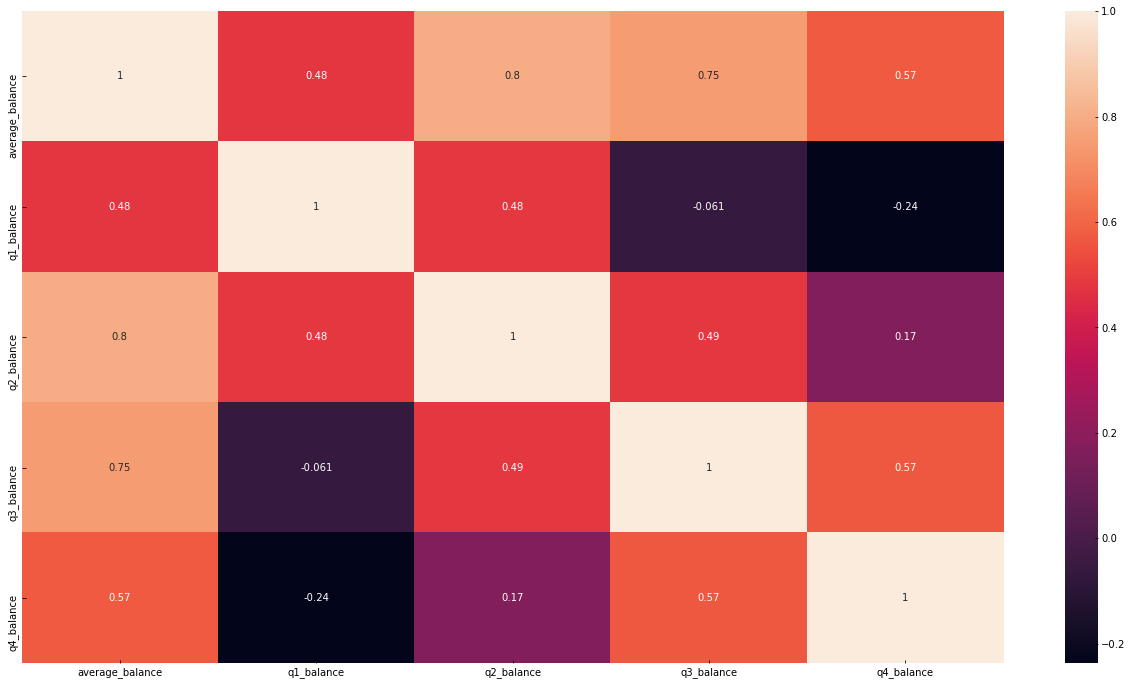

In [23]:
# there is not enough correlation to drop anything yet 
correlations_matrix = numericals.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(22, 12))
ax = sns.heatmap(correlations_matrix, annot=True)
plt.show()

### Correlation Analysis

We have reasonably high correlations, but not a strong enough colinearity to warrant dropping any column explicitly.

## 5.2 Checking for Outliers and Skew

We examined histograms of our numerical variables to quickly check for any outliers or skew.

<AxesSubplot:xlabel='average_balance', ylabel='Density'>

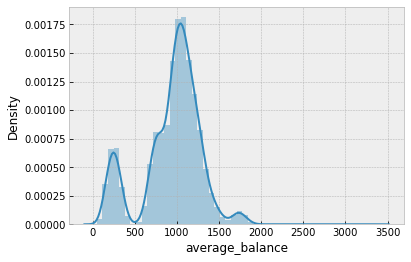

In [24]:
sns.distplot(numericals.average_balance)

<AxesSubplot:xlabel='q1_balance', ylabel='Density'>

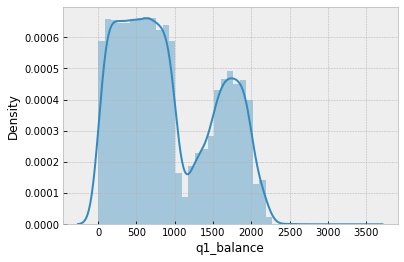

In [25]:
sns.distplot(numericals.q1_balance)

<AxesSubplot:xlabel='q2_balance', ylabel='Density'>

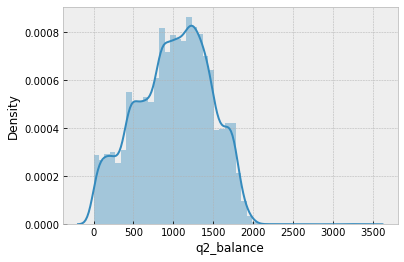

In [26]:
sns.distplot(numericals.q2_balance)

<AxesSubplot:xlabel='q3_balance', ylabel='Density'>

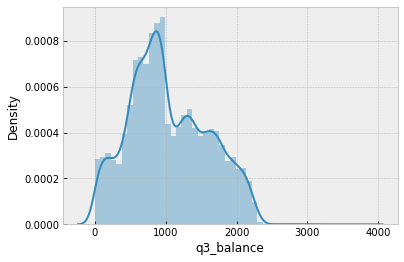

In [27]:
sns.distplot(numericals.q3_balance)

<AxesSubplot:xlabel='q4_balance', ylabel='Density'>

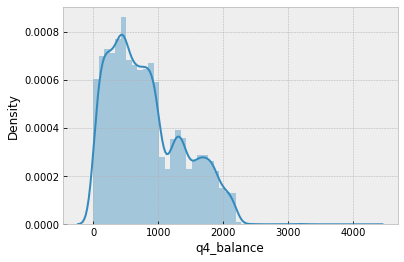

In [28]:
sns.distplot(numericals.q4_balance)

##  5.3 Reviewing Outliers and Skew

Here, we can see that there are quite a lot of outliers in the average balance column. Whether we excluded these outliers or not did not affect the accuracy of the model. 

<AxesSubplot:>

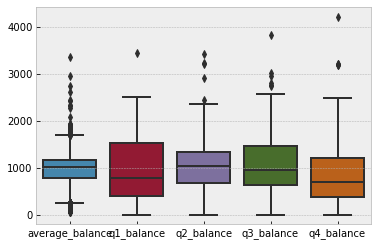

In [29]:
sns.boxplot(data=numericals)

## 5.4 Comparing to our Target

Now we can check the numerical columns against the dependent variable. We see that balance does not have a huge impact on whether a customer accepts the offer or not, but customers with higher balances were less likely to accept the offer. Almost all of the outliers rejected the offer.

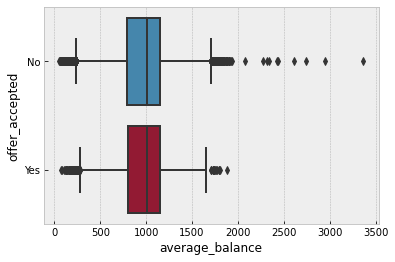

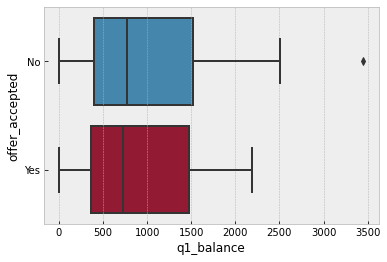

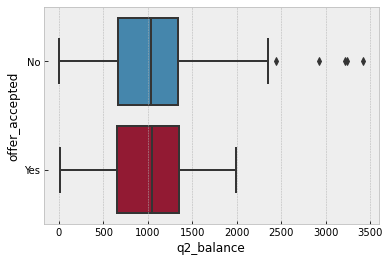

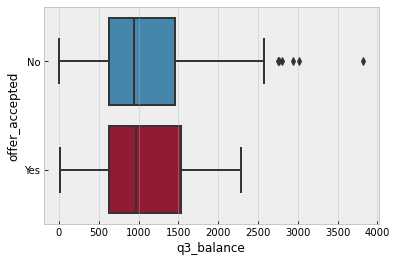

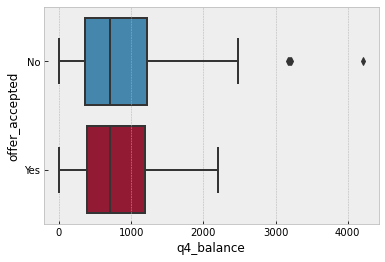

In [30]:
box(numericals)

## 5.6 Removing Skew

Here, we will dive into eliminating skew from our numerical variables. For every numerical column, most of the data was in the lower half of the table, so we used a log transformation to remove the right skew.


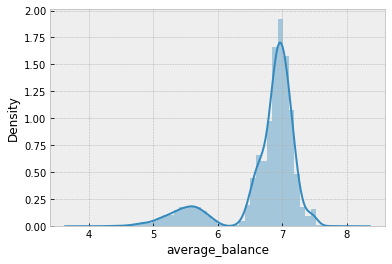

In [31]:
numericals['average_balance'] = list(map(log_transfom_clean, numericals['average_balance']))
sns.distplot(numericals.average_balance)
plt.show()

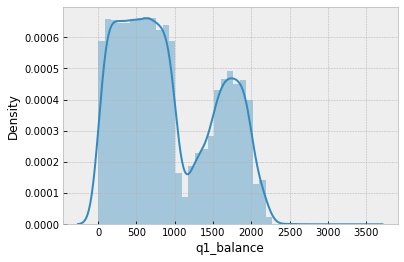

In [32]:
data['q1_balance'] = list(map(log_transfom_clean, numericals['q1_balance']))
sns.distplot(numericals.q1_balance)
plt.show()

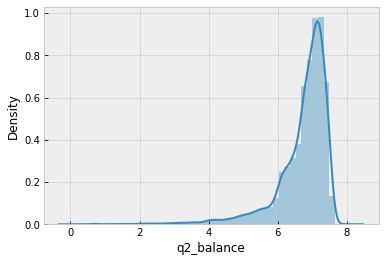

In [33]:
data['q2_balance'] = list(map(log_transfom_clean, data['q2_balance']))
sns.distplot(data.q2_balance)
plt.show()

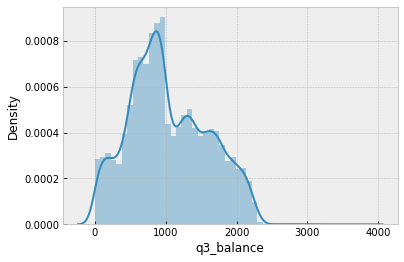

In [34]:
data['q3_balance'] = list(map(log_transfom_clean, numericals['q3_balance']))
sns.distplot(numericals.q3_balance)
plt.show()

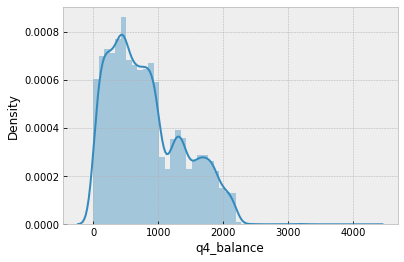

In [35]:
data['q4_balance'] = list(map(log_transfom_clean, numericals['q4_balance']))
sns.distplot(numericals.q4_balance)
plt.show()

# 6. Scaling Numericals

We opted to use a MinMax scaler due to the distribution shape being non-Gaussian. It ensures that our variables are scaled to values within 0 and 1

In [36]:
#Scaling numericals with Min-Max Scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(numericals)
scaled_df = pd.DataFrame(scaled_df, columns = numericals.columns)
scaled_df.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0.749189,0.483768,0.256358,0.286424,0.237722
1,0.262826,0.011304,0.030985,0.020403,0.086833
2,0.411248,0.106377,0.102894,0.037928,0.057414
3,0.760723,0.457391,0.514469,0.292702,0.099407
4,0.759172,0.620290,0.396668,0.256866,0.086595


In [37]:
numericals = scaled_df

In [38]:
numericals.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0.749189,0.483768,0.256358,0.286424,0.237722
1,0.262826,0.011304,0.030985,0.020403,0.086833
2,0.411248,0.106377,0.102894,0.037928,0.057414
3,0.760723,0.457391,0.514469,0.292702,0.099407
4,0.759172,0.620290,0.396668,0.256866,0.086595


# Concatenate Clean Data

Here, we will check DataFrame shape before concatenating the two cleaned datasets into a new df DataFrame.

In [39]:
numericals.shape

(17974, 5)

In [40]:
categoricals.shape

(17974, 11)

In [41]:
df = pd.concat((categoricals, numericals), axis=1)

In [42]:
df.head()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,3,2,1,2,1,1,1,2,1,4,0.749189,0.483768,0.256358,0.286424,0.237722
1,1,3,2,2,2,2,2,1,2,2,5,0.262826,0.011304,0.030985,0.020403,0.086833
2,1,3,1,1,2,2,2,2,2,1,2,0.411248,0.106377,0.102894,0.037928,0.057414
3,1,3,2,2,2,1,1,2,1,1,4,0.760723,0.457391,0.514469,0.292702,0.099407
4,1,3,2,2,2,2,2,1,2,1,6,0.759172,0.620290,0.396668,0.256866,0.086595


In [43]:
df.isna().sum()

offer_accepted          0
reward                  0
mailer_type             0
income_level            0
overdraft_protection    0
credit_rating           0
own_your_home           0
bank_accounts_open      0
credit_cards_held       0
homes_owned             0
household_size          0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

# 8. Logistic Regression

## 8.1 - Defining Variables

Before we can apply a model we are setting x and y prior to creating a training and test set.
- x are our features less houshold_size and overdraft_protection 
- y is our independent variable for "offer_accepted" Yes(1) or No(2)

In [44]:
#Setting x and y prior to creating a training and test set
y = df['offer_accepted']
x = df.drop(['offer_accepted', 'household_size', 'overdraft_protection'], axis=1)

#converting y from object to int - Python didn't want to accept the object type
y = y.astype('float')

In [45]:
#Import Packages for the Logistic Regression Function
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier

## 8.2 Logistic Regression Function

NOTE: Test and Training sets are regenerated for each regression to avoid errors.

We are going to use our previously created sample_all loop that will iterating through a Logistic Regression (logreg) and a KNN model (KNN) with diffrent sampling methods. 
Each model will take a different set of values for the sampling strategy:
- Random OverSampler
- Random Under Sampler
- SMOTE
<br>
<br>


The function will also provide:
- Accuracy score for logreg and KNN
- Confusion Matrix
- Receiver Operating Characteristic Plot




Random Oversampling Classification Score: 0.699215524360033

Logistic regression classifier on test set: 0.70

 [[3429 1707]
 [1336 3701]]
              precision    recall  f1-score   support

         1.0       0.72      0.67      0.69      5136
         2.0       0.68      0.73      0.71      5037

    accuracy                           0.70     10173
   macro avg       0.70      0.70      0.70     10173
weighted avg       0.70      0.70      0.70     10173


KNN Model Score:  0.9267669320751007 


 [[4391  745]
 [   0 5037]]
              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92      5136
         2.0       0.87      1.00      0.93      5037

    accuracy                           0.93     10173
   macro avg       0.94      0.93      0.93     10173
weighted avg       0.94      0.93      0.93     10173



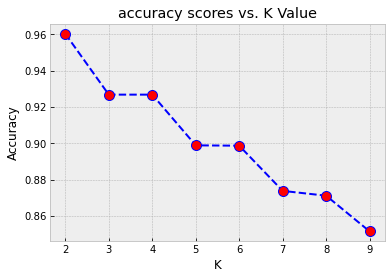

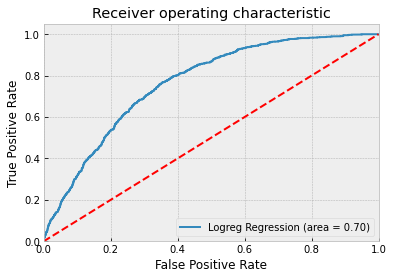

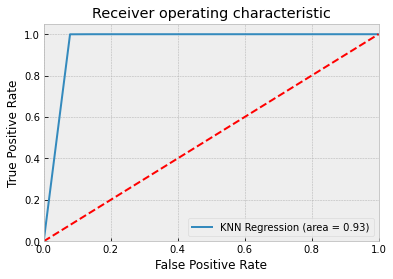



Random Undersampling Classification Score: 0.7024509803921568

Logistic regression classifier on test set: 0.67

 [[188 110]
 [ 95 219]]
              precision    recall  f1-score   support

         1.0       0.66      0.63      0.65       298
         2.0       0.67      0.70      0.68       314

    accuracy                           0.67       612
   macro avg       0.66      0.66      0.66       612
weighted avg       0.66      0.67      0.66       612


KNN Model Score:  0.619281045751634 


 [[209  89]
 [144 170]]
              precision    recall  f1-score   support

         1.0       0.59      0.70      0.64       298
         2.0       0.66      0.54      0.59       314

    accuracy                           0.62       612
   macro avg       0.62      0.62      0.62       612
weighted avg       0.63      0.62      0.62       612



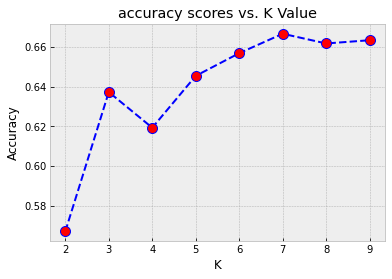

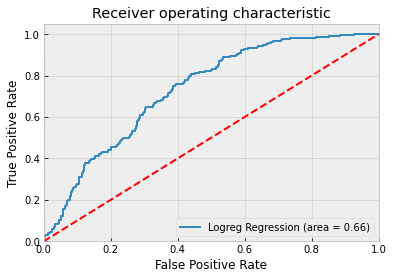

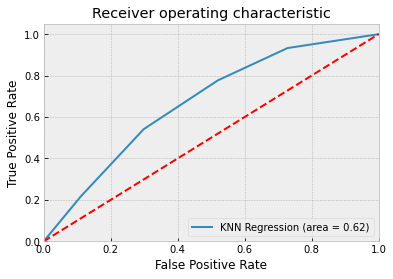



SMOTE Classification Score: 0.708800283119028

Accuracy of logistic regression classifier on test set: 0.70

 [[3414 1590]
 [1459 3710]]
              precision    recall  f1-score   support

         1.0       0.70      0.68      0.69      5004
         2.0       0.70      0.72      0.71      5169

    accuracy                           0.70     10173
   macro avg       0.70      0.70      0.70     10173
weighted avg       0.70      0.70      0.70     10173


KNN Model Score:  0.9137914086306891 


 [[4158  846]
 [  31 5138]]
              precision    recall  f1-score   support

         1.0       0.99      0.83      0.90      5004
         2.0       0.86      0.99      0.92      5169

    accuracy                           0.91     10173
   macro avg       0.93      0.91      0.91     10173
weighted avg       0.92      0.91      0.91     10173



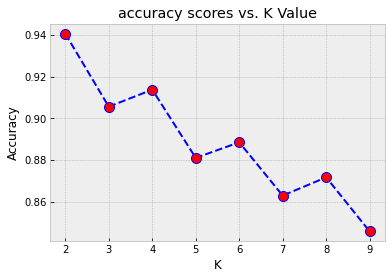

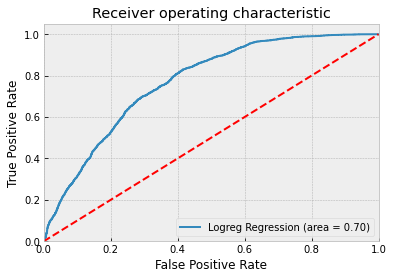

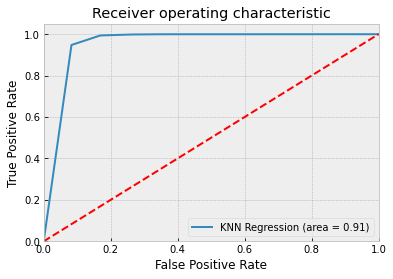

In [46]:
sample_all(x,y)

# Summary

- Logistic Regression:
 - Random Oversampling Classification Score: 0.702
 - Random Undersampling Classification Score: 0.696
 - SMOTE Classification Score: 0.711
<br>
<br>
<br>
- K-Nearest-Neighbor:
 - Random Oversampling Classification Score:  0.926 
 - Random Undersampling Classification Score: 0.637
 - SMOTE Classification Score: 0.909

<br>
Conclusion:

Our KNN scores are unrealistic, and additional transformations did not bring the classification scores back down to a realistic level, so we will be selecting a Logistic Regression, utilizing the SMOTE sampling technique (Score of 0.711) as our model of choice to provide to the bank to assess whether a client will accept or reject a credit card offer.

Our model predicted 'Yes' more than 71% of the time, but was 71% correct. This does not include True Negatives, False Positives, or False Negatives.

Below, we will iterate upon our model in efforts to improve it.

# 9 Further Analysis; Changing X

This section of the notebook was created for further data adjustments beyond initial data cleaning, to quickly test small changes to an X dataset of an unchanged shape against our independent Y variable.

Here, we will run two additional tests:

1. Removing Columns with High P-values 
2. Removing Outliers from Average Balance

In [47]:
#Checking the Shape of DF
df.shape

(17974, 16)

## 9.1 Columns with High P-Values

In [65]:
#Create new X
x = df[['reward', 'income_level','mailer_type','credit_rating']]
print (y.shape, x.shape)

#Setting x and y prior to creating a training and test set
y = df['offer_accepted']
x = df.drop(['offer_accepted', 'household_size', 'overdraft_protection'], axis=1)

#converting y from object to int - Python didn't want to accept the object type
y = y.astype('int')

(17974,) (17974, 4)




SMOTE Classification Score: 0.7041701073492981

Accuracy of logistic regression classifier on test set: 0.71

 [[3449 1709]
 [1276 3739]]
              precision    recall  f1-score   support

           1       0.73      0.67      0.70      5158
           2       0.69      0.75      0.71      5015

    accuracy                           0.71     10173
   macro avg       0.71      0.71      0.71     10173
weighted avg       0.71      0.71      0.71     10173



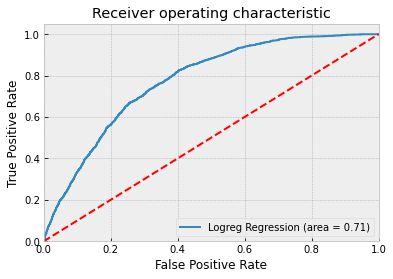

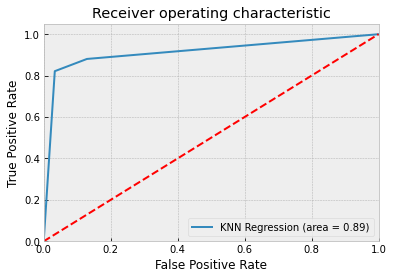

In [66]:
smote = SMOTE()
Xsmote = x
    
X_sm, y_sm = smote.fit_sample(Xsmote, y)
    
classification = LogisticRegression(random_state=0, solver='lbfgs',
                    multi_class='ovr').fit(X_sm, y_sm)
print('\n\nSMOTE Classification Score:', classification.score(X_sm, y_sm))
    
#Accuracy Score and Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print ('\nAccuracy of logistic regression classifier on test set: {:.2F}'.format(logreg.score(X_test,y_test)))
print('\n',confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
    
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1], pos_label=2)
plt.figure()
plt.plot(fpr, tpr, label='Logreg Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
    
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=2)
plt.figure()
plt.plot(fpr, tpr, label='KNN Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Summary

- Logistic Regression:
 - SMOTE Classification Score: 0.71
 
<br>
Conclusion:
Our model is, despite the number of removed columns, unchanged in terms of accuracy.

## 9.2 Outliers Removed from Average Balance

In [56]:
temp = df

#Removing IQR from average balance

iqr = np.percentile(temp['average_balance'],75) - np.percentile(temp['average_balance'],25)
upper_limit = np.percentile(temp['average_balance'],75) + 1.5*iqr
lower_limit = np.percentile(temp['average_balance'],25) - 1.5*iqr
temp = temp[(temp['average_balance']>lower_limit) & (temp['average_balance']<upper_limit)]

#Setting x and y prior to creating a training and test set
y = temp['offer_accepted']
x = temp.drop(['offer_accepted', 'household_size', 'overdraft_protection'], axis=1)

#converting y from object to int - Python didn't want to accept the object type
y = y.astype('int')

In [57]:
#checking shape
print (y.shape, x.shape)

(15436,) (15436, 13)




SMOTE Classification Score: 0.7112941984208719

Accuracy of logistic regression classifier on test set: 0.72

 [[3027 1317]
 [1157 3238]]
              precision    recall  f1-score   support

           1       0.72      0.70      0.71      4344
           2       0.71      0.74      0.72      4395

    accuracy                           0.72      8739
   macro avg       0.72      0.72      0.72      8739
weighted avg       0.72      0.72      0.72      8739



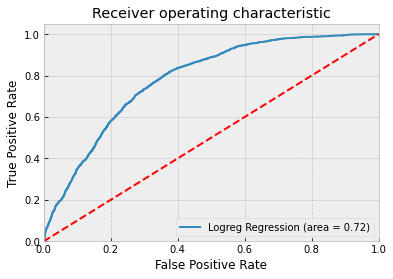

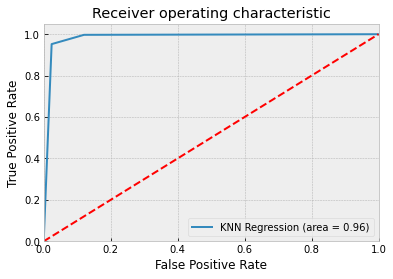

In [58]:
    smote = SMOTE()
    Xsmote = x
    
    X_sm, y_sm = smote.fit_sample(Xsmote, y)
    
    classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)
    print('\n\nSMOTE Classification Score:', classification.score(X_sm, y_sm))
    
    #Accuracy Score and Confusion Matrix
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    y_pred = logreg.predict(X_test)
    print ('\nAccuracy of logistic regression classifier on test set: {:.2F}'.format(logreg.score(X_test,y_test)))
    print('\n',confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1], pos_label=2)
    plt.figure()
    plt.plot(fpr, tpr, label='Logreg Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=2)
    plt.figure()
    plt.plot(fpr, tpr, label='KNN Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

### Summary

- Logistic Regression:
 - SMOTE Classification Score: 0.72
 
<br>
Conclusion:
Our model has improved, but very slightly. It predicted 'Yes' more than 72% of the time, but was 72% correct.